In [1]:
import sys


sys.path.append('..')

import requests
import pandas as pd
import tulipy as tp
import sqlite3
from utilities.config import DB_PATH
from utilities.indicators import DataFrame_constructor, test_best_range, close_below_lower_band, rsi_macd_oversold
from utilities.functions import do_db_connection, normalize
import numpy as np
from pathlib import Path


# csv_file = Path(__file__).resolve().parent / 'sp100.csv'
# csv_file = 'sp100.csv'
# symbols = pd.read_csv(csv_file)
# symbols = [symbol  if "." not in symbol else symbol.replace('.', '-') for symbol in symbols['Symbol']]

connection = do_db_connection(DB_PATH)
cursor = connection.cursor()

cursor.execute("select distinct Symbol from historical_data")
symbols = cursor.fetchall()
symbols = [symbol['Symbol'] for symbol in symbols]

data = []
filtered_symbols = []

for symbol in symbols:
    df = DataFrame_constructor(symbol, cursor)
    df = df.populate_df()

    oversold_rsi_macd = test_best_range(df, rsi_macd_oversold)
    # lower_bollinger_strat = test_best_range(df, close_below_lower_band)
    if oversold_rsi_macd:
        data.append(oversold_rsi_macd)
        filtered_symbols.append(symbol)
    # data[symbol]['close_below_lower_band'] = lower_bollinger_strat



In [2]:
# sorted_data = sorted(data, key=lambda x: data[x]['position_return'], reverse=True)
# data['MMM'].keys()
import matplotlib.pyplot as plt

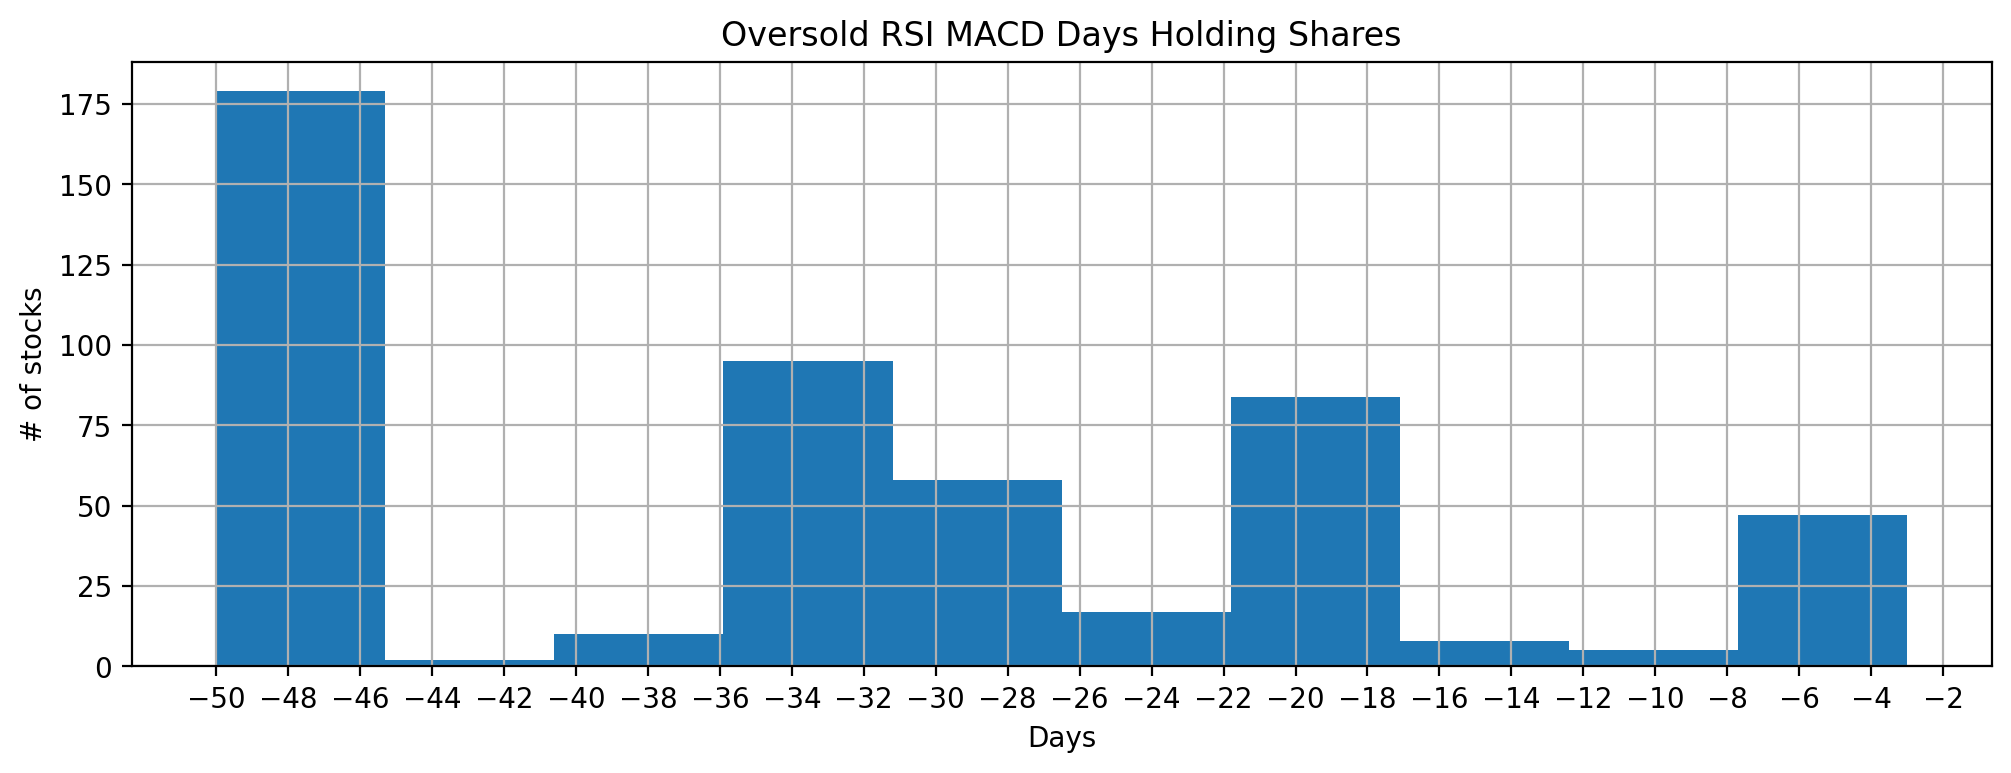

In [6]:
df = pd.DataFrame(index=filtered_symbols, data=data, columns=['days_of_hold', 'return'])
plt.figure(figsize=(12,4), dpi=200)
df['days_of_hold'].hist()
plt.title('Oversold RSI MACD Days Holding Shares')
plt.xlabel('Days')
plt.ylabel('# of stocks')
plt.xticks(range(-50, 0, 2));

In [10]:
average_days_holding = np.array([data[key]['day_to_check'] for key in data]).mean()
average_days_holding

-24.28181818181818

In [13]:
mean_return = np.array([data[key]["position_return"] for key in data]).mean()

In [14]:
mean_return

9.799534308711182